<a href="https://colab.research.google.com/github/dangalledi/Tareas_Mineria_de_Datos/blob/master/tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3

## Librerias

In [0]:
import pandas as pd
from pandas_profiling  import ProfileReport
import pandas_profiling
import numpy as np
from plotnine import *
theme_set(theme_linedraw()) # default theme

%matplotlib inline

## Leer el archivo

In [0]:
corazon = pd.read_csv('heart.csv')
corazon.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [0]:
profile = corazon.profile_report()

In [0]:
profile

## Elimina los duplicados

In [0]:
corazon = corazon.drop_duplicates()

### Simbologia

A la izquierda el 0 --> Simboliza a mujer 

A la derecha el 1 --> Simboliza a hombre

## Presión sanguínea en reposo (en mm Hg al ser admitido en el hospital)

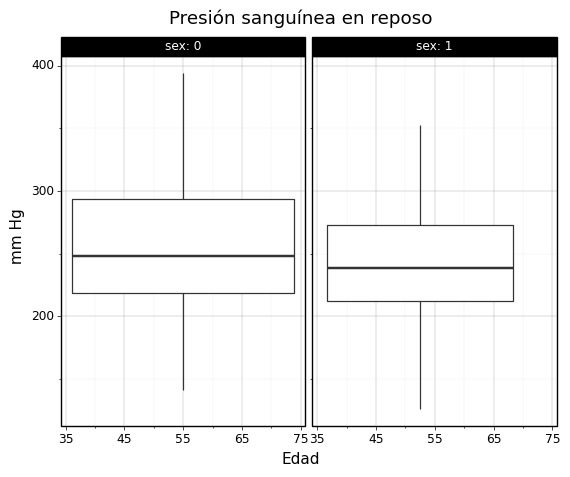

<ggplot: (-9223371877888197140)>

In [0]:
(ggplot(corazon)
 + ggtitle('Presión sanguínea en reposo')
 + aes('age','chol')
 + aes(color='chol')
 + geom_boxplot()
# + stat_smooth()
 + facet_wrap('sex',labeller = label_both)
 + labs(x='Edad', y=' mm Hg')
)
#resting blood pressure (in mm Hg on admission to the hospital)

## Serum cholestoral in mg/dl

C:\Users\Lenovo\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


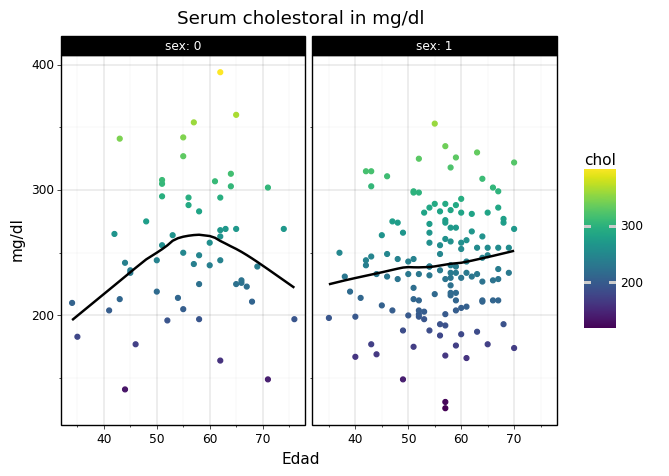

<ggplot: (-9223371877888510528)>

In [0]:
#serum cholestoral in mg/dl

for i in corazon.chol:
    if i>400:
        corazon = corazon.drop(corazon[corazon['chol']==i].index)
        
(ggplot(corazon)
 + ggtitle('Serum cholestoral in mg/dl')
 + aes('age','chol')
 + aes(color='chol')
 + geom_point()
 + stat_smooth()
 + facet_wrap('sex',labeller = label_both)
 + labs(x='Edad', y='mg/dl')
)

## Frecuencia cardíaca máxima alcanzada

C:\Users\Lenovo\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


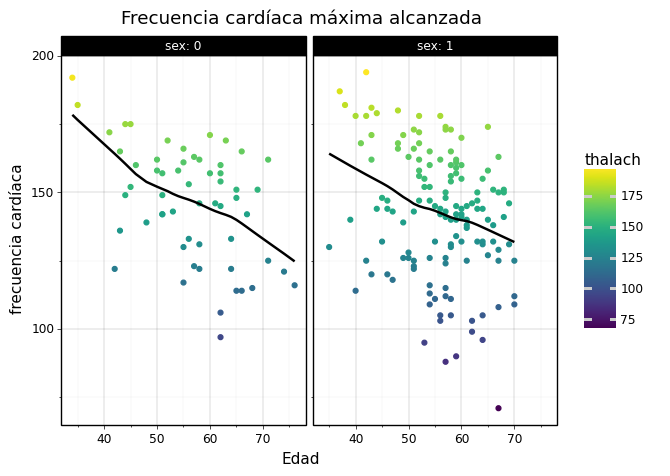

<ggplot: (-9223371877890154840)>

In [0]:
(ggplot(corazon)
 + ggtitle('Frecuencia cardíaca máxima alcanzada')
 + aes('age','thalach')
 + aes(color='thalach')
 + geom_point()
 + stat_smooth()
 + facet_wrap('sex',labeller = label_both)
 + labs(x='Edad', y='frecuencia cardíaca')
)
#maximum heart rate achieved

## ST depression induced by exercise relative to rest

C:\Users\Lenovo\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


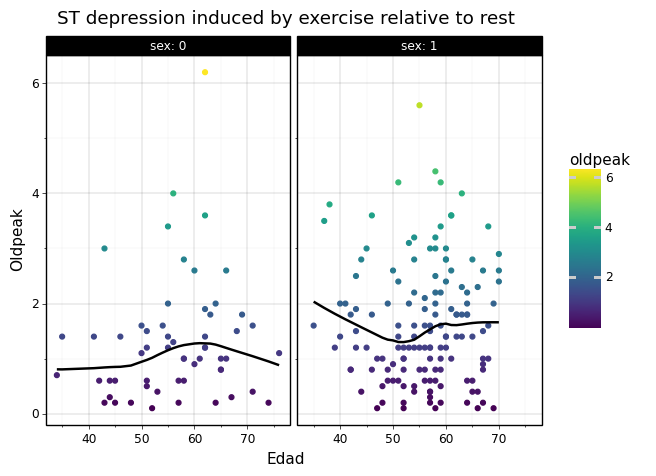

<ggplot: (-9223371877890259156)>

In [0]:
#oldpeak = ST depression induced by exercise relative to rest
(ggplot(corazon)
  + ggtitle('ST depression induced by exercise relative to rest')
 + aes('age','oldpeak')
 + aes(color='oldpeak')
 + geom_point()
 + stat_smooth()
 + facet_wrap('sex',labeller = label_both)
 + labs(x='Edad', y='Oldpeak')
 
)  

Como se puede observar en el grafico y en el warning que aparece en el reporte, hay muchos valores que estan en 0, en la siguiente celda se eliminaran las filas con 0

In [0]:
corazon = corazon.drop(corazon[corazon['oldpeak']==0].index)#elimina zeros

C:\Users\Lenovo\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


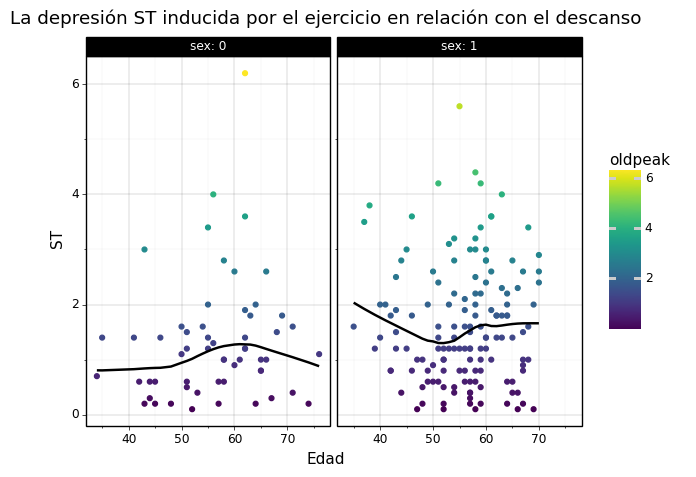

<ggplot: (-9223371877892692520)>

In [0]:
(ggplot(corazon)
 + ggtitle('La depresión ST inducida por el ejercicio en relación con el descanso')
 + aes('age','oldpeak')
 + aes(color='oldpeak')
 + geom_point()
 + stat_smooth()
 + facet_wrap('sex',labeller = label_both)
 + labs(x='Edad', y='ST')
)        

## Number of major vessels (0-3) colored by flourosopy

In [0]:
corazon = corazon.drop(corazon[corazon['ca']==4].index)

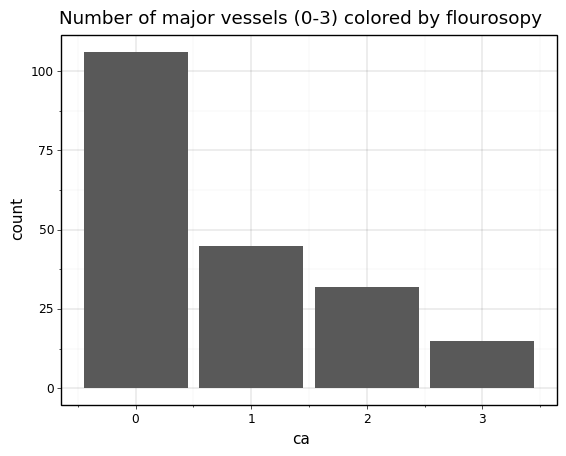

<ggplot: (-9223371877890920040)>

In [0]:
(ggplot(corazon)
 + geom_bar(aes(x='ca'))
 + aes (fill='sex')
 +ggtitle('Number of major vessels (0-3) colored by flourosopy')
)

In [0]:
profile = corazon.profile_report()

In [0]:
profile

In [0]:
profile.to_file('corazon.html')